**Aikins Acheampong**

Fall 2024

CS 251: Data Analysis and Visualization

# Lab 4b | Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-dark'])
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.figsize': [6,6]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Visualize PCA for a 2D dog data set

The goal of this lab is for you to gain experience visualizing the covariance matrix and principal components. We begin with a data set that has the mid-range value for height (in inches) and weight (in pounds) for each of 146 dog breeds. The data set was constructed from part of a data set made available on Kaggle (https://www.kaggle.com/datasets/jasleensondhi/dog-intelligence-comparison-based-on-size).

### Task 1a: Scatter plot the original and normalized data

1. Use pandas to read data/ACK_Breed_Inof_mid.csv in a data fram
2. Examine the contents of the data frame
3. Make a data frame that has just the weight (first) and height (second) columns. You can do that by indexing into the data frame with the list `['weight_mid_lbs','height_mid_inches']`. Store it in a variable named `x_df`
4. Scatter plot the height vs weight (i.e. height on y-axis, weight on x-axis)
5. Normalize ths columns by subtracting the min and then dividing the difference by the max minus min (storing the result in `x_df`). Note that since you are operating with a data frame, you do not need to supply axis information - it will automatically apply the operation along each column.
6. In a new figure, scatter plot the normalized height vs weight.

   weight_mid_lbs  height_mid_inches
0           100.0               27.0
1           125.0               28.0
2            97.5               25.0
3           100.0               25.0
4            85.0               27.0


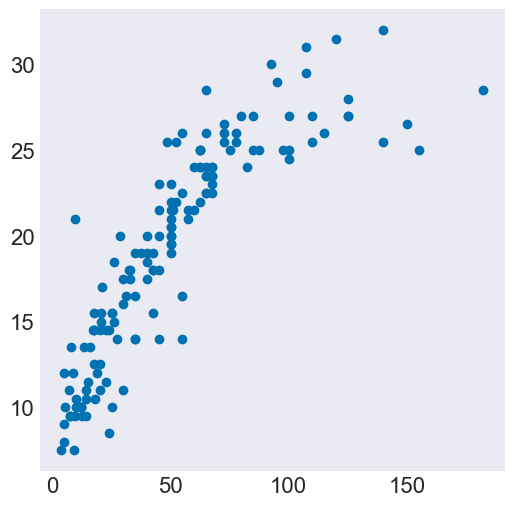

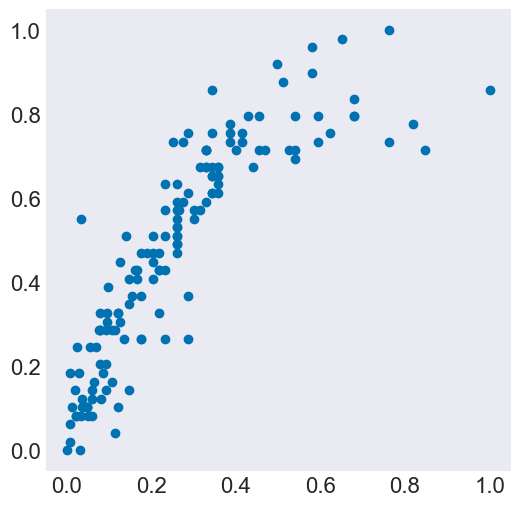

In [2]:
# Your code here
akc_df = pd.read_csv('data/AKC_Breed_Info_mid.csv')
# print(akc_df.head())
x_df = akc_df[['weight_mid_lbs', 'height_mid_inches']]
print(x_df.head())
plt.scatter(x=x_df['weight_mid_lbs'], y=x_df['height_mid_inches'])
x_df = (x_df-x_df.min())/ (x_df.max() - x_df.min())
# print(x_df.head())
plt.figure()
plt.scatter(x=x_df['weight_mid_lbs'], y=x_df['height_mid_inches'])

### 1b. Create and visualize a covariance matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the covariance matrix of the `x_df` columns, store it in a variable, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the xticks, yticks, xticklabels and ytickslabels. When setting the xtick labels, rotate them so they are readable and horizontally align them to the right (i.e. `ha='right'`). You can also use `setp` to handle rotating the x-axis tick labels.
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

*Your heatmap should show a 2x2 grid of colored squares.*

                   weight_mid_lbs  height_mid_inches
weight_mid_lbs           0.039920           0.043595
height_mid_inches        0.043595           0.064617


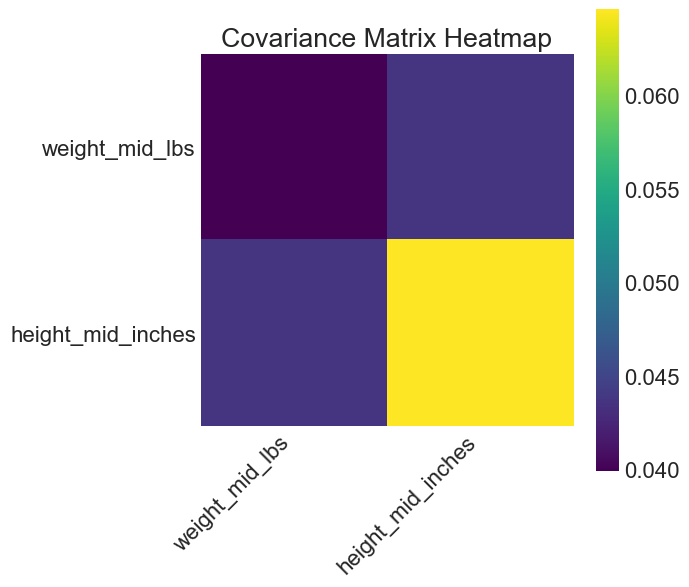

(2, 2)


In [3]:
# Your code here
cov_matrix = x_df.cov()
print(cov_matrix)
cov_matrix_shape = cov_matrix.shape

plt.imshow(cov_matrix, cmap='viridis', interpolation='none')
plt.title('Covariance Matrix Heatmap')

plt.xticks(ticks=[0, 1], labels=cov_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=[0, 1], labels=cov_matrix.index)

plt.colorbar()

plt.show()

print(cov_matrix_shape)






### 1c. Questions

**Question 1:** What interpretations can you draw from this covariance matrix?

**Answer 1:**

### 1d. Performing PCA

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to the dog dataset.
1. Create an instance of the PCA class with 2 components. *This means that we will compute all the principal components (eigenvectors of the covariance matrix) for our 2-D data set*.
2. Call the method `fit_` with `x_df` as the X parameter.
3. Store the transpose of the `components_` field of the PCA object in an variable named e_vecs. Then print it. The output should be

`[[ 0.6031   0.79766]
 [ 0.79766 -0.6031 ]]`

Each column of `e_vecs` is a principal component.

4. Store the `explained_variance_` field of the PCA object in a variable named `e_vals`. The first entry in `e_vals` is the eigen-value associated with the first column of `e_vecs`. Print the values. They should be `[0.09758 0.00696]`

In [4]:
from sklearn.decomposition import PCA

In [5]:
# Your code here

pca = PCA(n_components=2)

pca.fit(x_df)

e_vecs = pca.components_.T
print("Eigenvectors (Principal Components):")
print(e_vecs)

e_vals = pca.explained_variance_
print("\nEigenvalues (Explained Variance):")
print(e_vals)


Eigenvectors (Principal Components):
[[ 0.6031   0.79766]
 [ 0.79766 -0.6031 ]]

Eigenvalues (Explained Variance):
[0.09758 0.00696]


### 1e. Visualize the vectors on the scatter plot

When we perform PCA in just two dimensions, it is helpful to plot the eigenvectors as vectors on the scatter plot, so we can clearly identify the primary and secondary directions of variation in the data. The vectors should start at the center of the data and their lengths should be proportional to their associated eigenvalues (so we can capture the relative importance of the directions). You should think of the entries in the eigenvectors as slopes. For the sake of simplicity (and time), I have worked out the scale you should use for this example (it is 8).

1. Compute the center of the data and store it as a numpy array (rather than as a data frame): `center = x_df.mean().to_numpy()`
2. Scatter plot the columns of x_df as above (copy-paste your code)
3. Using the `plot` function, plot the first vector. Provide x-coordinates for the beginning of the line (`center[0]`) and the end, which is computed by adding 8 times the first `e_val` times the x-coordinate of the first eigenvector (i.e. `e_vec[0,0]`). Provide the y-coordinates for the begining (`center[1]`) and end, which is computed by adding 8 times the first `e_val` times the y-coordinate of the first eigenvector (i.e. `e_vec[1,0]`)
4. Plot the second vector in a similar fashion. Just use the second egeinvalue and second eigenvector instead of the first.

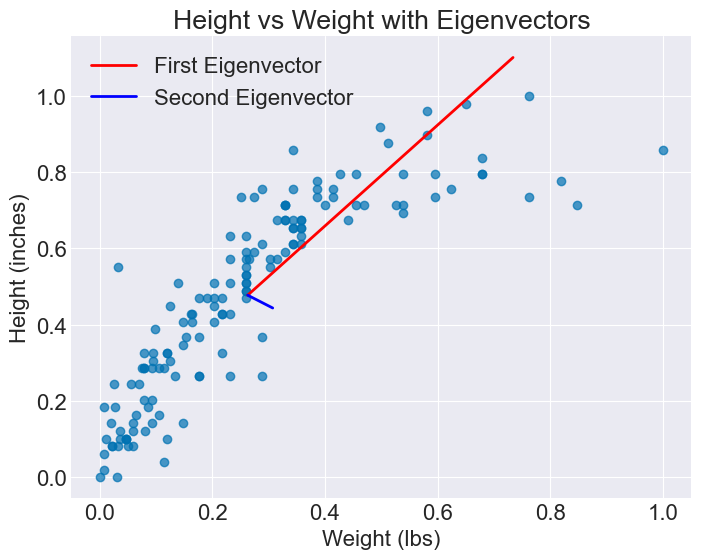

In [6]:
# Your code here
center = x_df.mean().to_numpy()

scale = 8

plt.figure(figsize=(8, 6))
plt.scatter(x_df['weight_mid_lbs'], x_df['height_mid_inches'], alpha=0.7)
plt.title('Height vs Weight with Eigenvectors')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.grid(True)

plt.plot(
    [center[0], center[0] + scale * e_vals[0] * e_vecs[0, 0]],
    [center[1], center[1] + scale * e_vals[0] * e_vecs[1, 0]],
    color='red', linewidth=2, label='First Eigenvector'
)

plt.plot(
    [center[0], center[0] + scale * e_vals[1] * e_vecs[0, 1]],
    [center[1], center[1] + scale * e_vals[1] * e_vecs[1, 1]],
    color='blue', linewidth=2, label='Second Eigenvector'
)

plt.legend()

plt.show()


### 1f. Visualize the PCA loadings as a heat map

When we have more than 2 dimensions, we need to use alternate forms of visualization, so let's look at an alternate method now, so we can compare it to the vector version about. We introduce a new term -- **loadings**. In PCA, the **loadings** refer to the numbers that make up the principal component vectors (i.e. the eigenvectors). The shape of the loadings (eigenvectors) are `(k, M)` where `k` is the number of PCs and `M` is the number of original variables in the dataset. This task focuses on visualizing and interpreting what the loadings mean.

Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to make a heatmap of the loadings (which are in `e_vecs`).
   
1. Include a title.
2. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`. The y tick labels (rows) should show the original 10 variable names. The 2 x tick labels should be labeled with `'PC1'` and `'PC2'`.
3. Use an perceptually uniform **diverging** [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). Set it using the `cmap` parameter for `imshow`.
4. To ensure that 0 is indicated by the neutral/middle color in the colormap, we need the data to be color-mapped using a range that is centered on zero. Compute the magnitude of the loadings (the maximim absolute loading). If you store that magnitude in a variable, named `mag`, then you can add the parameter and value to the imshow call: `norm=matplotlib.colors.Normalize(-mag,mag)`.
5. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

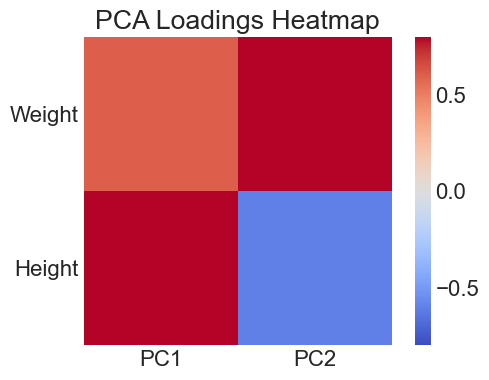

In [7]:
# Your code here
import matplotlib.colors as mcolors

mag = np.max(np.abs(e_vecs))

plt.figure(figsize=(6, 4))
im = plt.imshow(e_vecs, cmap='coolwarm', norm=mcolors.Normalize(vmin=-mag, vmax=mag))

plt.title('PCA Loadings Heatmap')

plt.xticks(ticks=[0, 1], labels=['PC1', 'PC2'])
plt.yticks(ticks=[0, 1], labels=['Weight', 'Height'])

plt.colorbar(im)

plt.show()


### 1g. Questions

**Question 2:** Interpret the loadings of PC1 and PC2 by relating them to the vector plot above. Also, does height or weight play a larger role in the first vector? 

**Answer 2:**

The loadings of PC1 show that both weight and height contribute positively, suggesting that the first principal component captures an overall size trend. This aligns with the vector plot where the first eigenvector (red) points in a direction influenced by both variables. PC2, with positive weight and negative height loadings, shows an inverse relationship, which is reflected in the second eigenvector (blue).

Weight plays a slightly larger role in PC1 because its loading is higher than height, meaning variations in weight influence the first principal component more significantly than variations in height.

## Task 2: PCA on a cancer data set

### 2a. Load and preprocess

To get a tate of PCA for a larger data set, we will use the [Wisconsin Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)) this week. To keep the lab assignment manageable, we provide some of the code (you can think of the instructions as explanations of the code, in this case).

1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv
2. Create a `cancer_x` DataFrame which includes all of the columns that have the word "mean" in the title (*there should be 10 in total*).
3. Print out a summary of the `cancer_x` DataFrame.
4. Update `cancer_x` so that each variable is min-max normalized. Print out a summary of the updated DataFrame.
5. `diagnosis` is a categorical variable (`M` stands for "malignant" and `B` stands for "benign"). Create a `cancer_y` Series with from the column `diagnosis` and convert the data type to [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html).
    1. In Task 2 of this lab you will use `diagnosis` to color-code a scatter plot of the cancer data. Use [rename_categories](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#renaming-categories) to replace the categorical levels with color string names. To do this, pass in a dictionary as the parameter that maps the strings `'M'` and `'B'` to [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) of your choice (e.g. `'red'`, `'blue'`). By default, the `rename_categories` method doesn't update the DataFrame when you call it, so don't forget to update the value of `cancer_y` by assigning it to the output of your `rename_categories` method call.
    2. Print out `cancer_y`. You should see the `dtype` as `category` and the values should be one of two named color strings (e.g. `'red'`, `'blue'`).

In [11]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"

# Note that if it does not work for you to read the file directly
# from the internet, then follow the link in a browser, download the file, 
# and read it directly from your computer
cancer_data = pd.read_csv(url) 

# Step 2: Create a `cancer_x` DataFrame which includes all columns with the word "mean" in the title
cancer_x = cancer_data.filter(like="mean")

# Step 3: Print out a summary of the `cancer_x` DataFrame
print("Summary of cancer_x DataFrame (before normalization):")
print(cancer_x.describe())

# Step 4: Normalize each variable in `cancer_x` using min-max normalization
cancer_x = (cancer_x - cancer_x.min()) / (cancer_x.max() - cancer_x.min())

# Print out a summary of the updated DataFrame
print("\nSummary of cancer_x DataFrame (after normalization):")
print(cancer_x.describe())

# Step 5: Create `cancer_y` Series from the 'diagnosis' column and convert to categorical
cancer_y = cancer_data['diagnosis'].astype('category')

# Rename categories to color names
cancer_y = cancer_y.cat.rename_categories({'M': 'red', 'B': 'blue'})

# Print out `cancer_y` to confirm the changes
print("\nDiagnosis column (cancer_y) with categories as colors:")
print(cancer_y.head())

x_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
cancer_x = cancer_data[x_names]
print('Means of cancer_x:\n', cancer_x.mean())

cancer_x = (cancer_x-cancer_x.min())/(cancer_x.max()-cancer_x.min())
cancer_y = cancer_data['diagnosis'].astype('category')
cancer_y = cancer_y.cat.rename_categories({'M': 'red', 'B': 'blue'})
print(cancer_y)

Summary of cancer_x DataFrame (before normalization):
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.01

### 2b. Visualize with pair-plots

Scatter plot the data with every pair of features, using the diagnosis for the color. Label the y-axis of the first column and the x-axis of the bottom row with the feature names. Do not use any x- or y-ticks.

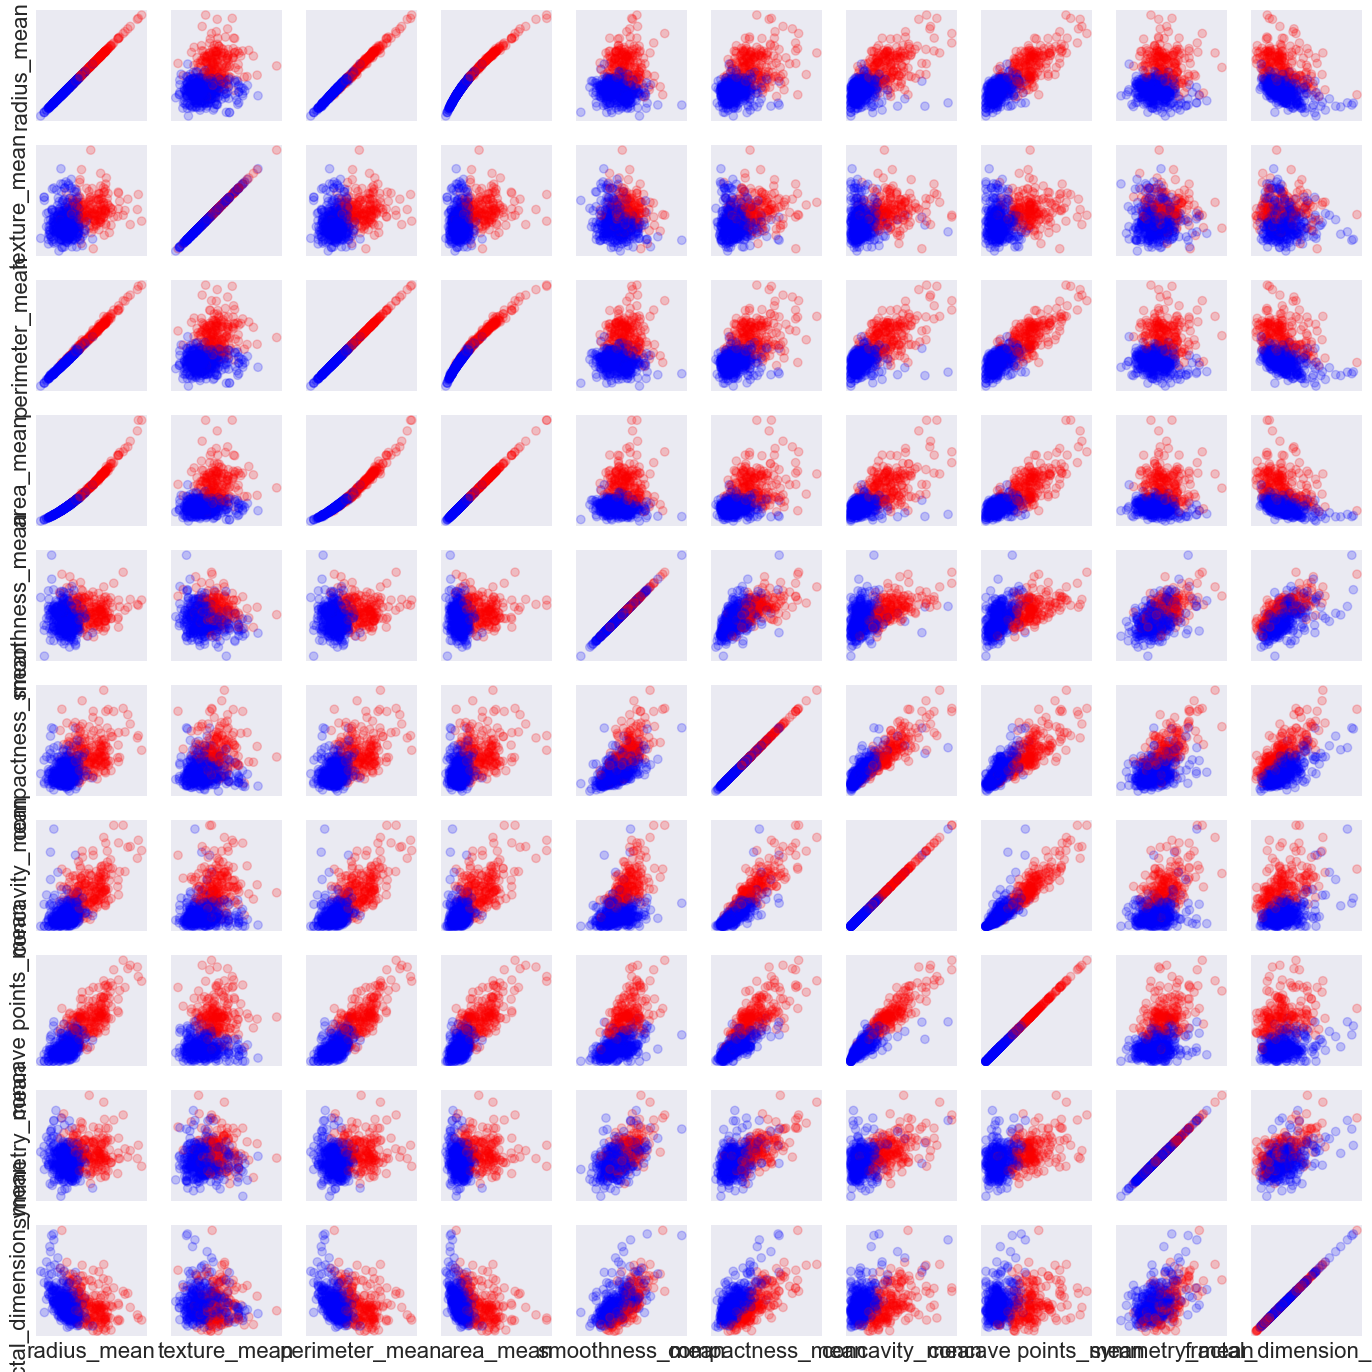

In [10]:
# pair plot
plt.figure( figsize=(14,14))
cx = cancer_x.to_numpy()
for row_idx in range(cx.shape[1]):
    for col_idx in range(cx.shape[1]):
        plt.subplot( cx.shape[1], cx.shape[1], row_idx*cx.shape[1]+col_idx+1 )
        plt.scatter( cx[:,col_idx], cx[:,row_idx], color=cancer_y, alpha=0.2 )
        plt.xticks([])
        plt.yticks([])
        if row_idx == cx.shape[1]-1:
            plt.xlabel( x_names[col_idx] )
        if col_idx == 0:
            plt.ylabel( x_names[row_idx])
plt.tight_layout()
plt.show()

### 2c. Create and visualize a covariance matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the covariance matrix of the `cancer_x` columns, store it in a variable, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the xticks, yticks, xticklabels and ytickslabels. When setting the xtick labels, rotate them so they are readable and horizontally align them to the right (i.e. `ha='right'`). You can also use `setp` to handle rotating the x-axis tick labels.
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

*Your heatmap should show a 10x10 grid of colored squares.*

Shape of the covariance matrix: (10, 10)


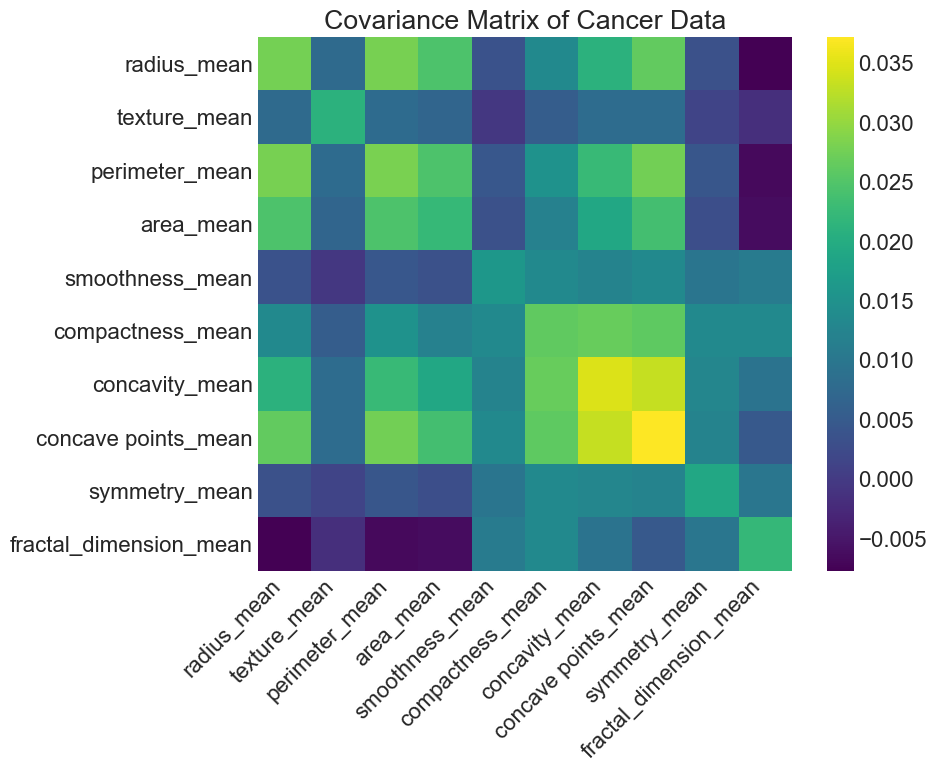

In [12]:
# Your code here
# Step 1: Compute the covariance matrix
cov_matrix = cancer_x.cov()

# Print the shape of the covariance matrix
print("Shape of the covariance matrix:", cov_matrix.shape)

# Step 2: Visualize the covariance matrix with a heatmap
plt.figure(figsize=(10, 8))

# Use imshow to visualize the covariance matrix
im = plt.imshow(cov_matrix, cmap='viridis')

# Step 2.1: Add a title
plt.title('Covariance Matrix of Cancer Data')

# Step 2.2: Set xticks, yticks, xticklabels, and yticklabels
plt.xticks(ticks=np.arange(len(x_names)), labels=x_names, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(x_names)), labels=x_names)

# Step 2.4: Add a colorbar
plt.colorbar(im)

plt.tight_layout()
plt.show()


### 2d. Questions

**Question 3:** What interpretations can you draw from this covariance matrix?

**Answer 3:**

The covariance matrix shows how different features of the cancer dataset vary together. Features like **radius_mean**, **perimeter_mean**, **area_mean**, and **concave points_mean** have strong positive covariances, indicating they increase together. This suggests that these features are highly correlated. In contrast, features such as **fractal_dimension_mean** and **smoothness_mean** have lower or even slightly negative covariance with other features, indicating weaker relationships. The diagonal values represent the variance within each feature, with higher values indicating more variability. This matrix highlights the interdependencies between features in the dataset.

### 2c. Performing PCA

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to the cancer dataset.
1. Create an instance of the PCA class with `len(x_names)` components. *This means that we will compute all 10 eigenvectors in our 10-D data set*.
2. Call the method `fit_` with `cancer_x` as the X parameter.
3. Store the transpose of the `components_` field of the PCA object in an variable named e_vecs. Print the shape to verify it is `(10,10)`. Note that each column of `e_vecs` is a principal component.
4. Store the `explained_variance_` field of the PCA object in a variable named `e_vals`. The first entry in `e_vals` is the eigen-value associated with the first column of `e_vecs`, etc. Print the values. There should be 10.

In [13]:
# Your code here
from sklearn.decomposition import PCA

# Step 1: Create an instance of the PCA class with len(x_names) components (10 components)
pca = PCA(n_components=len(x_names))

# Step 2: Fit the PCA model with cancer_x
pca.fit(cancer_x)

# Step 3: Store the transpose of the components_ field and print its shape
e_vecs = pca.components_.T
print("Shape of e_vecs (Eigenvectors):", e_vecs.shape)

# Step 4: Store the explained_variance_ field and print the eigenvalues
e_vals = pca.explained_variance_
print("Eigenvalues (Explained Variance):", e_vals)




Shape of e_vecs (Eigenvectors): (10, 10)
Eigenvalues (Explained Variance): [0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00206 0.00121 0.00027
 0.00001]


### 2d. Visualize the PCA loadings

As above, plot the loadings for all of the principal components.

1. Print out the shape of the loadings (`e_vecs`). 
2. Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to make a heatmap of the loadings. You should plot the **transposed** loadings, which will make your plot more readable — i.e. your heatmap should be taller than it is wide.
   1. Make the figure large enough that all the tick labels will fit (e.g. width of 12). Also, include a title.
   2. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`. The y tick labels (rows) should show the original 10 variable names. The x tick labels should be labeled with `'PC1'`, `'PC2'`, ..., `'PC10'`.
   3. Use an perceptually uniform **diverging** [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). Set it using the `cmap` parameter for `imshow`.
   4. To ensure that 0 is indicated by the neutral/middle color in the colormap, we need the data to be color-mapped using a range that is centered on zero. Compute the magnitude of the loadings (the maximim absolute loading). If you store that magnitude in a variable, named `mag`, then you can add the parameter and value to the imshow call: `norm=matplotlib.colors.Normalize(-mag,mag)`.
   5. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

Shape of the loadings (e_vecs): (10, 10)


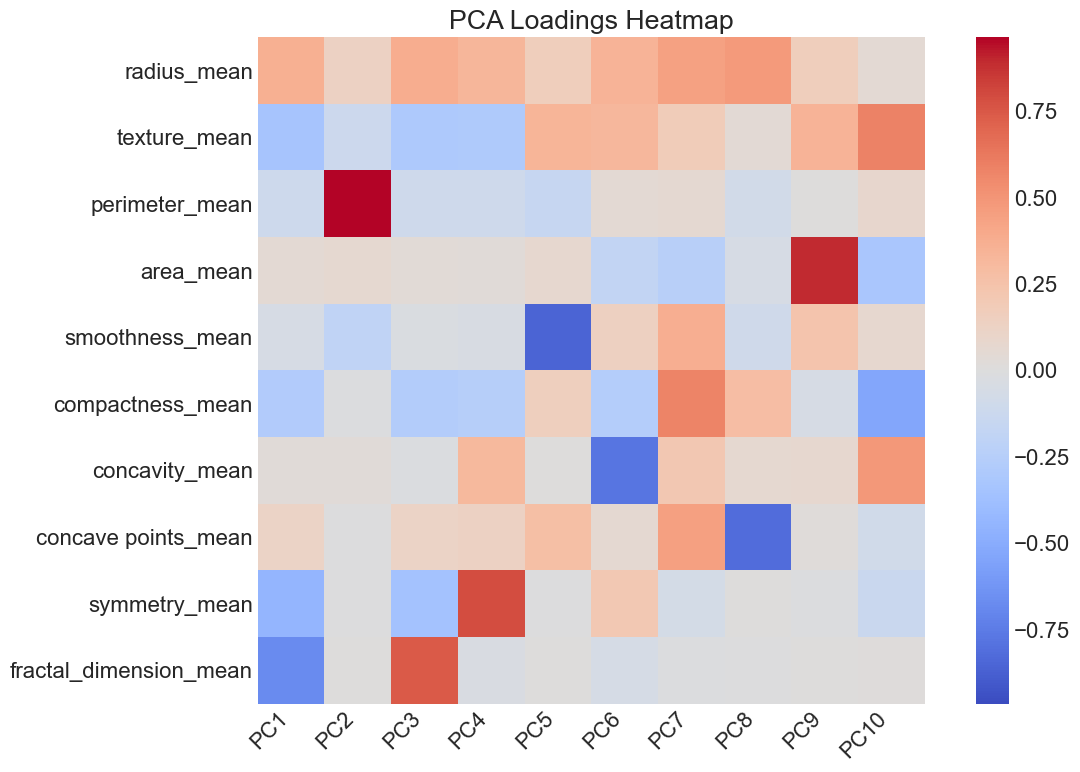

In [14]:
# Your code here
import matplotlib.colors as mcolors

# Step 1: Print the shape of e_vecs (loadings)
print("Shape of the loadings (e_vecs):", e_vecs.shape)

# Step 2: Visualize the transposed loadings (e_vecs.T) with a heatmap
plt.figure(figsize=(12, 8))

# Transpose the loadings for a better visualization
e_vecs_transposed = e_vecs.T

# Step 2.3: Compute the maximum absolute loading for normalization
mag = np.max(np.abs(e_vecs_transposed))

# Create the heatmap using imshow
im = plt.imshow(e_vecs_transposed, cmap='coolwarm', norm=mcolors.Normalize(vmin=-mag, vmax=mag))

# Step 2.1: Add a title
plt.title('PCA Loadings Heatmap')

# Step 2.2: Set the xticks, yticks, xticklabels, and yticklabels
plt.xticks(ticks=np.arange(len(x_names)), labels=[f'PC{i+1}' for i in range(len(x_names))], rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(x_names)), labels=x_names)

# Step 2.5: Add a colorbar
plt.colorbar(im)

plt.tight_layout()
plt.show()


### 2e. Questions

**Question 4:** Interpret the loadings of PC1 and PC2. Which variables in the cancer dataset are most positively and negatively correlated with each PC?

**Answer 4:**

For **PC1**, the most positively correlated variables are **radius_mean**, **perimeter_mean**, and **area_mean**, indicating that these features contribute most to the first principal component. These variables are related to the overall size of the tumor. The most negatively correlated variable is **concave points_mean**.

For **PC2**, the most positively correlated variable is **texture_mean**, while **smoothness_mean** is the most negatively correlated. This suggests that PC2 captures variations related to the texture and smoothness of the tumor, rather than its size. Each component highlights distinct patterns in the data.

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.